In [69]:
import util_mnist_reader as mnist_reader
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [58]:
#(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [59]:
X_train = X_train.reshape(-1, 28,28, 1)
X_test = X_test.reshape(-1, 28,28, 1)

In [60]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [61]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [62]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

X_train = X_train[5000:]
y_train = y_train[5000:]

X_val = X_train[:5000]
y_val = y_train[:5000]

In [73]:
history = model.fit(X_train, y_train, epochs=5, batch_size=600, validation_data=(X_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 46s 839us/step - loss: 0.3000 - acc: 0.8919 - val_loss: 0.2817 - val_acc: 0.9004
Epoch 2/5
55000/55000 [==============================] - 46s 845us/step - loss: 0.2858 - acc: 0.8983 - val_loss: 0.2682 - val_acc: 0.9038
Epoch 3/5
55000/55000 [==============================] - 50s 907us/step - loss: 0.2725 - acc: 0.9025 - val_loss: 0.2610 - val_acc: 0.9092
Epoch 4/5
55000/55000 [==============================] - 51s 931us/step - loss: 0.2627 - acc: 0.9060 - val_loss: 0.2437 - val_acc: 0.9120
Epoch 5/5
55000/55000 [==============================] - 51s 930us/step - loss: 0.2553 - acc: 0.9088 - val_loss: 0.2390 - val_acc: 0.9110


In [74]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

10000/10000 [==============================] - 2s 237us/step
Test loss 0.2888911596894264
Test accuracy 0.8947


In [75]:
predictions = model.predict(X_test)
print(np.argmax(np.round(predictions[0])))

9


In [76]:
# Y_pred = np.argmax(test_Y_one_hot, axis=1)
# confusion_matrix(test_Y, Y_pred)
# Y_pred = model.predict(X_test, batch_size=64)
# Y_pred = np.argmax(Y_pred, axis=1)
# test_Y = to_categorical(y_test)
#confusion_matrix(to_categorical(test_Y), model.predict(test_X, batch_size=64).argmax(axis=1))
# print(confusion_matrix(Y_pred, y_test.argmax(axis=1)))
# train_Y_one_hot = np.argmax(train_Y_one_hot, axis=1)

Y_pred = model.predict(X_test, batch_size=64)
print(confusion_matrix(y_test.argmax(axis=1),Y_pred.argmax(axis=1)))
print(classification_report(y_test.argmax(axis=1), Y_pred.argmax(axis=1)))

[[871   0  26  15   3   1  80   0   4   0]
 [  1 978   2  13   3   0   1   0   2   0]
 [ 15   0 889   8  34   0  53   0   1   0]
 [ 24  11  20 884  21   1  37   0   2   0]
 [  2   1  93  29 794   0  81   0   0   0]
 [  0   0   0   0   0 976   0  17   0   7]
 [156   2  97  18  57   0 659   0  11   0]
 [  0   0   0   0   0  12   0 967   1  20]
 [  4   1   9   3   1   3   8   4 967   0]
 [  1   0   0   0   0   4   0  33   0 962]]
             precision    recall  f1-score   support

          0       0.81      0.87      0.84      1000
          1       0.98      0.98      0.98      1000
          2       0.78      0.89      0.83      1000
          3       0.91      0.88      0.90      1000
          4       0.87      0.79      0.83      1000
          5       0.98      0.98      0.98      1000
          6       0.72      0.66      0.69      1000
          7       0.95      0.97      0.96      1000
          8       0.98      0.97      0.97      1000
          9       0.97      0.96      

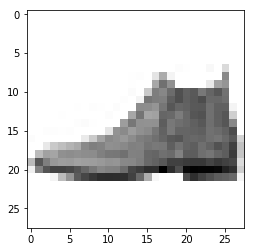

In [77]:
plt.imshow(X_test[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

In [78]:
model.history.history.keys()

dict_keys(['acc', 'val_acc', 'val_loss', 'loss'])

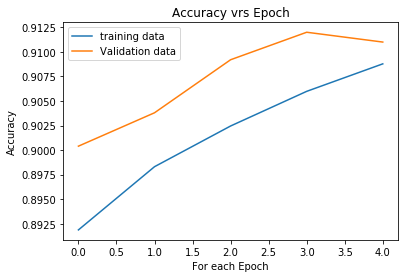

In [85]:
plt.plot(model.history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('For each Epoch')
plt.title('Accuracy vrs Epoch')
plt.legend(['training data', 'Validation data'], loc='upper left')
plt.show()

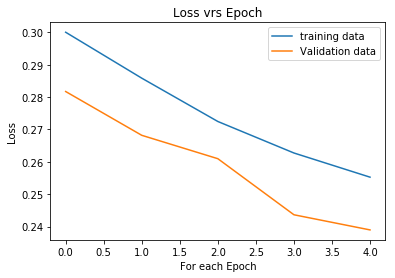

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('For each Epoch')
plt.title('Loss vrs Epoch')
plt.legend(['training data', 'Validation data'], loc='upper right')
plt.show()